In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Review the data

In [2]:
data = pd.read_csv('real_estate.csv')
data.head(6)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1


## Train a Regression Model

Let's explore and prepare the data, identify features that will help to predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) when evaluated against a test data.


In [6]:

X, y = data[['transaction_date', 'house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']].values,data['price_per_unit'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 331 rows
Test Set: 83 rows


In [10]:
# here is our Linear Regression model

LR = LinearRegression()
model = LR.fit(X_train, y_train)

In [11]:
predictions = model.predict(X_test)

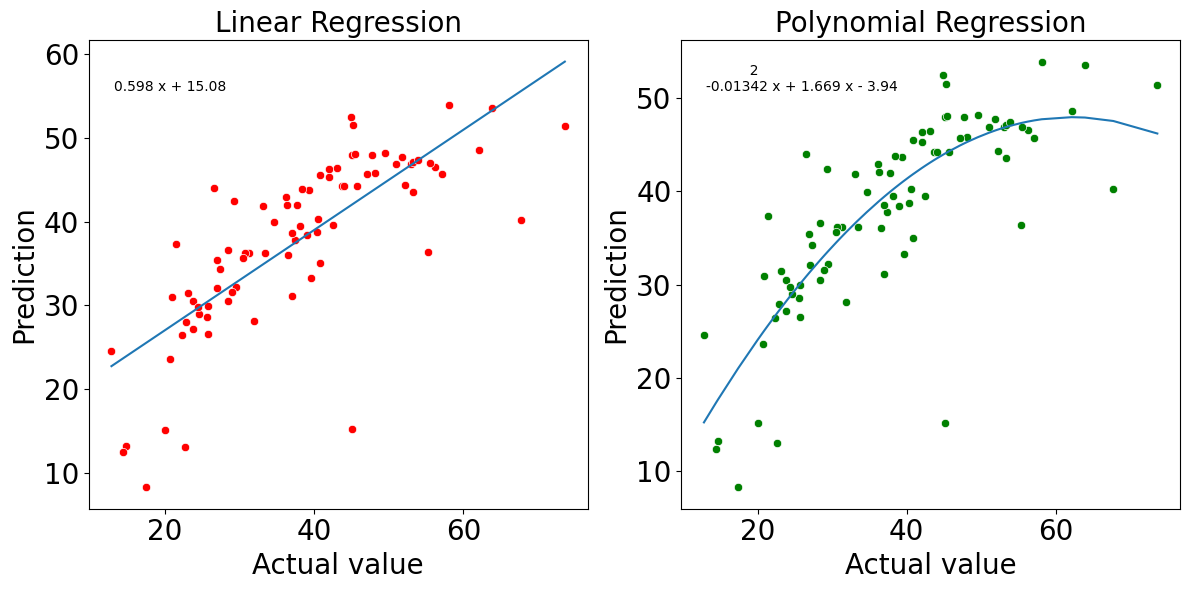

In [12]:
z_degree_1 = np.polyfit(y_test, predictions, 1)  # Degree 1 regression
p_degree_1 = np.poly1d(z_degree_1)
z_degree_2 = np.polyfit(y_test, predictions, 2) # Degree 2 regression
p_degree_2 = np.poly1d(z_degree_2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # subplots

############################# Print and plot the polynomial function of degree 1

sns.scatterplot(x=y_test, y=predictions, ax=axes[0], color='red')
sns.lineplot(x=y_test, y=p_degree_1(y_test), ax=axes[0])
axes[0].set_xlabel('Actual value', fontsize=20)
axes[0].set_ylabel('Prediction', fontsize=20)
axes[0].set_title('Linear Regression', fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=20)

poly_function_degree_1 = np.poly1d(z_degree_1)
axes[0].text(0.05, 0.95, poly_function_degree_1, transform=axes[0].transAxes, fontsize=10,
             verticalalignment='top')


############################# Print and plot the polynomial function of degree 2

sns.scatterplot(x=y_test, y=predictions, ax=axes[1], color='green')
sns.lineplot(x=y_test, y=p_degree_2(y_test), ax=axes[1])
axes[1].set_xlabel('Actual value', fontsize=20)
axes[1].set_ylabel('Prediction', fontsize=20)
axes[1].set_title('Polynomial Regression', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=20)

poly_function_degree_2 = np.poly1d(z_degree_2)
axes[1].text(0.05, 0.95, poly_function_degree_2, transform=axes[1].transAxes, fontsize=10,
             verticalalignment='top')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate

In [14]:
# predictions for both models

p_degree_1y = p_degree_1(y_test)
p_degree_2y = p_degree_2(y_test)

MSE_degree_1 = mean_squared_error(y_test, p_degree_1y)
MSE_degree_2 = mean_squared_error(y_test, p_degree_2y)

RMSE_degree_1 = np.sqrt(MSE_degree_1)
RMSE_degree_2 = np.sqrt(MSE_degree_2)

R2_degree_1 = r2_score(y_test, p_degree_1y)
R2_degree_2 = r2_score(y_test, p_degree_2y)



linear_regression_metrics = {
    "Metric": ["MSE", "RMSE", "R2"],
    "Linear Regression (Degree 1)": [round(MSE_degree_1, 2), round(RMSE_degree_1, 2), round(R2_degree_1, 2)],
    "Polynomial Regression (Degree 2)": [round(MSE_degree_2, 2), round(RMSE_degree_2, 2), round(R2_degree_2, 2)]
}

print(tabulate(linear_regression_metrics, headers="keys", tablefmt="fancy_grid", numalign="center", stralign="center"))


╒══════════╤════════════════════════════════╤════════════════════════════════════╕
│  Metric  │  Linear Regression (Degree 1)  │  Polynomial Regression (Degree 2)  │
╞══════════╪════════════════════════════════╪════════════════════════════════════╡
│   MSE    │             27.65              │               35.48                │
├──────────┼────────────────────────────────┼────────────────────────────────────┤
│   RMSE   │              5.26              │                5.96                │
├──────────┼────────────────────────────────┼────────────────────────────────────┤
│    R2    │              0.84              │                0.79                │
╘══════════╧════════════════════════════════╧════════════════════════════════════╛


### The Degree 1 Linear Regression has a lower MSE and RMSE, and a higher R2 value compared to the Degree 2 Polynomial Regression. Therefore, based on these metrics, the Degree 1 Linear Regression model appears to performing better than the Degree 2 Polynomial Regression model. 

## we can do a hyperparameter tuning for the  n_estimators  

In [15]:
# grid
param_grid = {
    'n_estimators': [5, 10, 30, 50,  80],
    'max_depth': [10, 40],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
}

results = []
RFregressor = RandomForestRegressor()

# grid search and CV
grid_search = GridSearchCV(estimator=RFregressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_mse = float('inf')
best_params_for_MSE = None

for params, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    RFregressor.set_params(**params)
    RFregressor.fit(X_train, y_train)
    predictions = RFregressor.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    results.append({'Parameters': params, 'MSE': mse})
    
    # Update the best parameters 
    if mse < best_mse:
        best_mse = mse
        best_params_for_MSE = params

results_df = pd.DataFrame(results)
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))
print("Set of parameters with smallest MSE:", best_params_for_MSE)
print("Smallest MSE:", best_mse)


╒═══════════════════════════════════════════════════════════════════════════════════════╤═════════╕
│ Parameters                                                                            │     MSE │
╞═══════════════════════════════════════════════════════════════════════════════════════╪═════════╡
│ {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}   │ 36.2062 │
├───────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│ {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}  │ 33.3167 │
├───────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│ {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}  │ 36.2137 │
├───────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│ {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}  │ 32.7676 │


In [16]:
best_params_for_MSE

{'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [17]:
regressor_best_params_for_MSE = RandomForestRegressor(**best_params_for_MSE)
regressor_best_params_for_MSE.fit(X_train, y_train)
predictions_best_params_for_MSE = regressor_best_params_for_MSE.predict(X_test)

# MSE, RMSE, and R2 score:
mse_best_params_for_MSE = mean_squared_error(y_test, predictions_best_params_for_MSE)
print("MSE:", mse_best_params_for_MSE)
rmse_best_params_for_MSE = np.sqrt(mse_best_params_for_MSE)
print("RMSE:", rmse_best_params_for_MSE)
r2_best_params_for_MSE = r2_score(y_test, predictions_best_params_for_MSE)
print("R2:", r2_best_params_for_MSE)


MSE: 35.75288548546036
RMSE: 5.979371663098085
R2: 0.7909077191034186


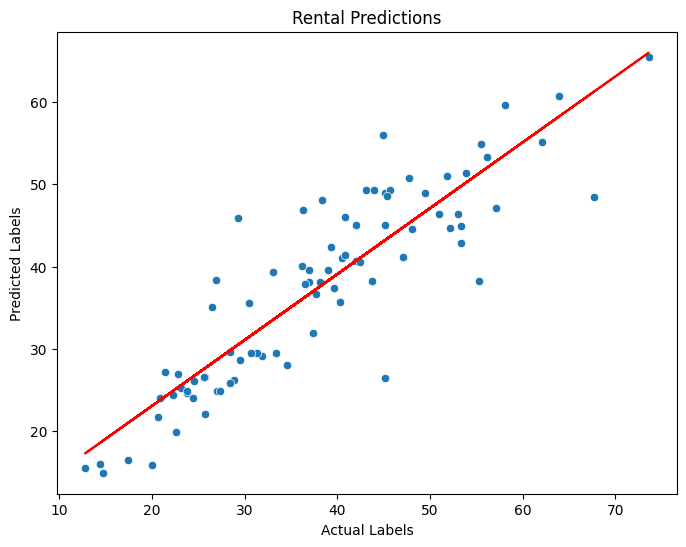

In [18]:
predictions_best_params = regressor_best_params_for_MSE.predict(X_test)

#  scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions_best_params)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Rental Predictions')

z = np.polyfit(y_test, predictions_best_params, 1)  # Linear model
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')  # Plotting the regression line

plt.show()


## Use the Trained Model

Save trained model, and then we'll use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [45]:
X1 = [2013.167, 16.2, 289.3248, 5, 24.98203, 121.54348]
X2 = [2013.000, 13.6, 4082.015, 0, 24.94155, 121.50381]

Xnew = [X1, X2]
ynew = regressor_best_params_for_MSE.predict(Xnew)
ynew

array([49.60541049, 17.2831888 ])

## Train a fully connected neural network

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # to use cpu  power

data = pd.read_csv('real_estate.csv')  

X = data[['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']]  ## features
y = data['price_per_unit']   ## target

scaler = StandardScaler()
X = scaler.fit_transform(X)

#  training, validation, and test sets
X_train, X_t, y_train, y_t = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_t, y_t, test_size=0.5, random_state=42)

In [5]:
# model NN
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=5))  # 5 input features
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression
model.compile(loss='mean_squared_error', optimizer='adam')

num_epochs = 50
history = model.fit(X_train, y_train, epochs= num_epochs, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# check the model on the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# MAE, MSE and RMSE are calculated on 
# the test dataset.

Epoch 1/50
10/10 [==============================] - 1s 13ms/step - loss: 1630.5725 - val_loss: 1388.1757
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 1516.1290 - val_loss: 1244.3209
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 1316.0880 - val_loss: 982.0854
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 966.2054 - val_loss: 595.4986
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 509.1223 - val_loss: 241.0456
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 210.0389 - val_loss: 146.8356
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 160.3248 - val_loss: 115.6470
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 121.1011 - val_loss: 105.1163
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 111.4980 - val_loss: 99.8680
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 103.

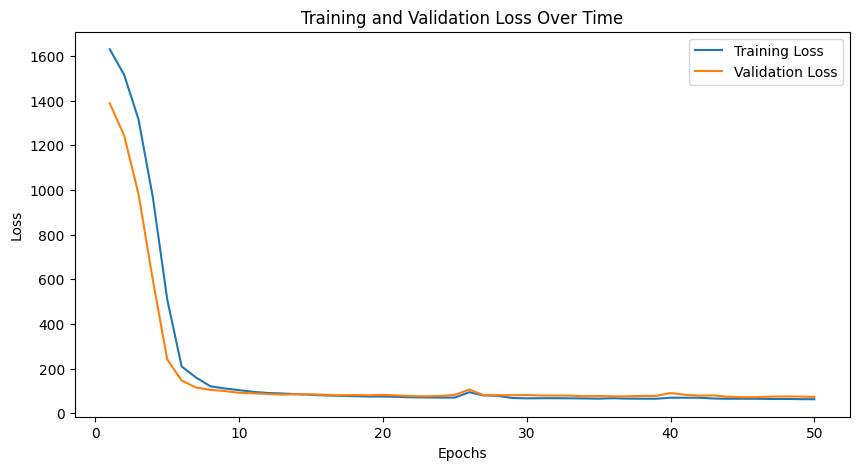

In [6]:

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()